In [1]:
import random, glob
import numpy as np

In [2]:
music_files = [a for a in glob.glob("dataset/*/*")]
print("A random song", random.sample(music_files, 1))

A random song ['dataset\\mendelssohn\\mendel_op19_2.mid']


In [3]:
from music21 import midi
def play_midi_file(midi_file_name):
    mf = midi.MidiFile()

    mf.open(midi_file_name) # path='abc.midi'
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

In [4]:
len(music_files)

300

In [5]:
from music21 import converter,corpus, chord

In [6]:
def get_score(music_files):
    chords = []
    for file_no, filename in enumerate(music_files):
        try:
            chords.append(converter.parse(filename))
            print(f'Happening of {file_no}', "filename = ", filename)
            
        except:
            print(f'Happening of {file_no}', "filename = ", filename)
            print("file failed!!!!!")
            continue
        
    
    return chords

In [7]:
music_files_5 = music_files[:5]
#get_chords(music_files[:10])

In [8]:
score_of_all_musics = get_score(music_files_5)

Happening of 0 filename =  dataset\albeniz\alb_esp1.mid
Happening of 1 filename =  dataset\albeniz\alb_esp1.song
file failed!!!!!
Happening of 2 filename =  dataset\albeniz\alb_esp2.mid
Happening of 3 filename =  dataset\albeniz\alb_esp3.mid
Happening of 4 filename =  dataset\albeniz\alb_esp4.mid


In [9]:
score_of_all_musics

[<music21.stream.Score 0x14f02ebbb50>,
 <music21.stream.Score 0x14f03684fd0>,
 <music21.stream.Score 0x14f0369d9a0>,
 <music21.stream.Score 0x14f041a4a30>]

In [10]:
from music21 import chord, duration

Classifying the music into different modes
- firstly, let's code for major mode

In [11]:
from music21 import *

In [12]:
def round_chord_durations(number):
    if(number>1.25):
        return 2
    if(number>.30):
        return 1.25
    if(number>.10):
        return 0.3
    return 0.1

For chord and duration of a single song(music file)

In [13]:
def get_chord_and_duration_data(individual_score):
    chord_duration_data = []
    note_and_chord_sequence =[]
    
    note_and_chord_duration =[]   ## not for now:
    all_tempo= []
    
    #to see the number of tracks:
    print(len(individual_score.parts))
    
    for element in individual_score.flat:
        #print("element = ", element, type(element))
        
        if isinstance(element, chord.Chord):
            note_and_chord_sequence.append('<SOC>') ## Start of Chord
            [note_and_chord_sequence.append(pitch.nameWithOctave) for pitch in element.pitches]
            note_and_chord_sequence.append('<EOC>') ## End of Chord
            
            chord_duration =str(round_chord_durations(element.duration.quarterLength))
            note_and_chord_sequence.append(chord_duration)
            #print(chord_name, chord_duration)
            
        elif isinstance(element, note.Note):
            [note_and_chord_sequence.append(pitch.nameWithOctave) for pitch in element.pitches]
    
            note_duration = str(round_chord_durations(element.duration.quarterLength))
            note_and_chord_sequence.append(note_duration)
            #print(note_name, note_duration)
        
        elif isinstance(element, note.Rest):
            rest_note_name = element.name
            #print(rest_note_name)
            
        elif isinstance(element, tempo.MetronomeMark):
            tempo_bpm = element.getQuarterBPM()
            all_tempo.append(tempo_bpm)
            #print(tempo_bpm)
        else:
            print(element, type(element))
            
    
    print("tempo ko lagi = " ,np.quantile(all_tempo, .25), np.quantile(all_tempo, .50), np.quantile(all_tempo, .75) )
    print(note_and_chord_sequence)
    return note_and_chord_sequence

In [14]:
#get_chord_and_duration_data(score_of_all_musics[0])

In [15]:
chords_and_duration_data_all_music= []
for one_score in score_of_all_musics:
   chords_and_duration_data_all_music.append((get_chord_and_duration_data(one_score)))

2
<music21.metadata.Metadata object at 0x14f02ebbd90> <class 'music21.metadata.Metadata'>
Piano right: Piano right <class 'music21.instrument.Piano'>
Piano <class 'music21.instrument.Piano'>
Piano left: Piano left <class 'music21.instrument.Piano'>
Piano <class 'music21.instrument.Piano'>
<music21.clef.TrebleClef> <class 'music21.clef.TrebleClef'>
<music21.clef.TrebleClef> <class 'music21.clef.TrebleClef'>
F major <class 'music21.key.Key'>
F major <class 'music21.key.Key'>
<music21.meter.TimeSignature 3/4> <class 'music21.meter.base.TimeSignature'>
<music21.meter.TimeSignature 3/4> <class 'music21.meter.base.TimeSignature'>
<music21.bar.Barline type=final> <class 'music21.bar.Barline'>
<music21.bar.Barline type=final> <class 'music21.bar.Barline'>
tempo ko lagi =  106.5 118.0 132.125
['A5', '1.25', 'A3', '1.25', 'E6', '2', 'E4', '2', 'E6', '1.25', 'E4', '1.25', '<SOC>', 'D6', 'E6', '<EOC>', '0.3', '<SOC>', 'D4', 'E4', '<EOC>', '0.3', 'D6', '1.25', 'D4', '1.25', 'C6', '1.25', 'C4', '1.2

<music21.metadata.Metadata object at 0x14f03373880> <class 'music21.metadata.Metadata'>
Piano right: Piano right <class 'music21.instrument.Piano'>
Piano <class 'music21.instrument.Piano'>
Piano left: Piano left <class 'music21.instrument.Piano'>
Piano <class 'music21.instrument.Piano'>
<music21.clef.TrebleClef> <class 'music21.clef.TrebleClef'>
<music21.clef.TrebleClef> <class 'music21.clef.TrebleClef'>
G major <class 'music21.key.Key'>
G major <class 'music21.key.Key'>
<music21.meter.TimeSignature 3/8> <class 'music21.meter.base.TimeSignature'>
<music21.meter.TimeSignature 3/8> <class 'music21.meter.base.TimeSignature'>
<music21.meter.TimeSignature 3/4> <class 'music21.meter.base.TimeSignature'>
<music21.meter.TimeSignature 3/4> <class 'music21.meter.base.TimeSignature'>
<music21.meter.TimeSignature 10/4> <class 'music21.meter.base.TimeSignature'>
<music21.meter.TimeSignature 10/4> <class 'music21.meter.base.TimeSignature'>
<music21.meter.TimeSignature 3/8> <class 'music21.meter.base

In [16]:
# this is the main data:
chords_and_duration_data_all_music[0][1]
#np.asarray(chords_and_duration_data_all_music).shape

'1.25'

In [17]:
print("Generating music from our processed chords...")
proccessed_chords_to_midi_sample = get_music_midi_filename_from_chords(chords_and_duration_data_all_music[0][4:50])
print(proccessed_chords_to_midi_sample)
play_midi_file(proccessed_chords_to_midi_sample)

Generating music from our processed chords...


NameError: name 'get_music_midi_filename_from_chords' is not defined

from Tonic_mode_all, separating major and minor songs 

In [ ]:
tonic_mode_all[0][0], tonic_mode_all[0][-1]

In [18]:
all_major_songs_chords_and_duration = []
all_minor_songs_chords_and_duration = []
for i in range(len(tonic_mode_all)):
    if(tonic_mode_all[i][-1] == 'major'):
        try:
            all_major_songs_chords_and_duration.append(chords_and_duration_data_all_music[i])
        except:
            all_major_songs_chords_and_duration.append('NANNNNNN')
    else:
        try:
            all_minor_songs_chords_and_duration.append(chords_and_duration_data_all_music[i])
        except:
             all_minor_songs_chords_and_duration.append('NANNNNNN')

NameError: name 'tonic_mode_all' is not defined

In [19]:
len(all_minor_songs_chords_and_duration), #minor_songs_chords_with_duration, len(minor_songs_chords_with_duration)

(0,)

In [20]:
major_dataset = all_major_songs_chords_and_duration 
minor_dataset = all_minor_songs_chords_and_duration

In [21]:
#just a reference code
#major_dataset
#y=np.array(major_dataset)
#unique = set(major_dataset_all)
#unique2 = set(minor_dataset_all)

In [22]:
chords_and_duration_data_all_music[0][0]

'A5'

In [23]:
main_dataset = chords_and_duration_data_all_music

In [24]:
len(main_dataset[0])

1312

* Data preparation stage

In [25]:
#  !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [26]:
no_of_timesteps = 32
x = []
y = []
## CD stands for chord and duration.

for each_music_with_CD in main_dataset:
    for end_element in range(1 , len(each_music_with_CD) - 1):
        
        #print("end = ", end_element)
        ## preparing input and output sequences:
        input_ = each_music_with_CD[0 : end_element]
        output = each_music_with_CD [end_element]
        #print(input_)

        
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9140\1023418438.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x=np.array(x)


In [27]:
type(x)

numpy.ndarray

In [63]:
#assigning unique integer to every chords_and_duration

unique_x_CD = list(set(np.concatenate(x)))
unique_x_CD_to_int = dict((chord_and_duration, number) for number, chord_and_duration in enumerate(unique_x_CD))
unique_x_CD_to_int

{'A1': 0,
 'F#4': 1,
 'F6': 2,
 'D5': 3,
 'G4': 4,
 'G6': 5,
 'E6': 6,
 'C#6': 7,
 'A6': 8,
 'C5': 9,
 'F#6': 10,
 'D4': 11,
 'A7': 12,
 'E-7': 13,
 'B5': 14,
 'F3': 15,
 'F2': 16,
 'C7': 17,
 '2': 18,
 'G#5': 19,
 '<EOC>': 20,
 'E-3': 21,
 'E2': 22,
 'F#2': 23,
 'C#2': 24,
 'D3': 25,
 'E3': 26,
 'B6': 27,
 'C#3': 28,
 'C2': 29,
 'B-4': 30,
 'C#5': 31,
 'G#4': 32,
 'G5': 33,
 'A5': 34,
 'G3': 35,
 'F#7': 36,
 'E-4': 37,
 'B3': 38,
 'D2': 39,
 'B-2': 40,
 'G2': 41,
 'F#5': 42,
 'E4': 43,
 '<SOC>': 44,
 'C4': 45,
 'C#4': 46,
 'B-6': 47,
 'F5': 48,
 'F#3': 49,
 'E-5': 50,
 '0.1': 51,
 'D6': 52,
 'E5': 53,
 'G#3': 54,
 '1.25': 55,
 'E-6': 56,
 'C6': 57,
 'G#2': 58,
 'C#7': 59,
 'A2': 60,
 'B-5': 61,
 'B2': 62,
 'A3': 63,
 'D7': 64,
 'A4': 65,
 'C3': 66,
 'F4': 67,
 'B-3': 68,
 'E7': 69,
 'B4': 70,
 '0.3': 71}

In [64]:
#preparing input sequences::

x_seq=[]
for each_row in x:
    temp=[]
    for each_piece in each_row:
        #assigning unique integer to every note
        temp.append(unique_x_CD_to_int[each_piece])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)
x_seq.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_9140\3831730262.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_seq = np.array(x_seq)


(8464,)

In [65]:
# preparing th output sequences as well::

unique_y_CD = list(set(y))
unique_y_CD_to_int = dict((chord_and_duration, number) for number, chord_and_duration in enumerate(unique_y_CD)) 
unique_y_CD_to_int

{'A1': 0,
 'F#4': 1,
 'F6': 2,
 'D5': 3,
 'G4': 4,
 'G6': 5,
 'E6': 6,
 'C#6': 7,
 'A6': 8,
 'C5': 9,
 'F#6': 10,
 'D4': 11,
 'A7': 12,
 'E-7': 13,
 'B5': 14,
 'F3': 15,
 'F2': 16,
 'C7': 17,
 '2': 18,
 'G#5': 19,
 '<EOC>': 20,
 'E-3': 21,
 'E2': 22,
 'F#2': 23,
 'C#2': 24,
 'D3': 25,
 'E3': 26,
 'B6': 27,
 'C#3': 28,
 'C2': 29,
 'B-4': 30,
 'C#5': 31,
 'G#4': 32,
 'G5': 33,
 'A5': 34,
 'G3': 35,
 'F#7': 36,
 'E-4': 37,
 'B3': 38,
 'D2': 39,
 'B-2': 40,
 'G2': 41,
 'F#5': 42,
 'E4': 43,
 '<SOC>': 44,
 'C4': 45,
 'C#4': 46,
 'B-6': 47,
 'F5': 48,
 'F#3': 49,
 'E-5': 50,
 '0.1': 51,
 'D6': 52,
 'E5': 53,
 'G#3': 54,
 '1.25': 55,
 'E-6': 56,
 'C6': 57,
 'G#2': 58,
 'C#7': 59,
 'A2': 60,
 'B-5': 61,
 'B2': 62,
 'A3': 63,
 'D7': 64,
 'A4': 65,
 'C3': 66,
 'F4': 67,
 'B-3': 68,
 'E7': 69,
 'B4': 70,
 '0.3': 71}

In [66]:
y_seq=np.array([unique_y_CD_to_int[i] for i in y])
y_seq.shape

(8464,)

In [67]:
# preserving 80% of the data for training and the rest 20% for the evaluation:

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [68]:
len(x_train)

6771

In [69]:
x_train.shape

(6771,)

# model building phase:

In [70]:
import tensorflow as tf

In [71]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [72]:
tf.__version__

'2.11.0'

In [73]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K
from tensorflow import keras

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x_CD), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y_CD), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           7200      
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [74]:
def lstm():
    K.clear_session()
    model = Sequential()
    #embedding layer
    model.add(Input(shape= (None,)))
    model.add(Embedding(len(unique_x_CD), 100,trainable=True)) 
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(Activation('relu'))

    model.add(Dense(len(unique_y_CD), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    return model

In [75]:
model = lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         7200      
                                                                 
 lstm (LSTM)                 (None, None, 128)         117248    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 activation (Activation)     (None, 256)               0

In [76]:
!pip install pydot

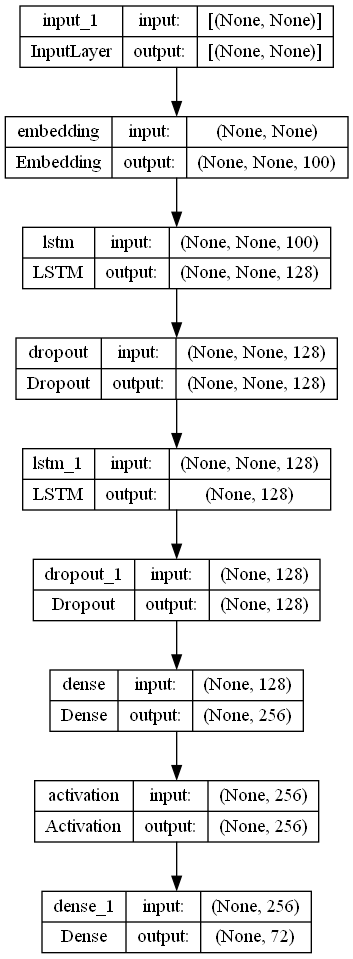

In [77]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [78]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
#[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, None) <dtype: 'float32'>
(None, 72) <dtype: 'float32'>


[None]

In [79]:
!pip install h5py

In [80]:
import h5py

In [81]:
#defining call back to save the best model during training>
mc=ModelCheckpoint('my_best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [82]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [83]:
num_words= 71
#x_train = np.random.randint(num_words, size=(6771, 10))
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    x_train, padding="post"
)

In [84]:
padded_inputs[0]

array([34, 55, 63, ...,  0,  0,  0])

In [ ]:
#actual training
history = model.fit(np.array(padded_inputs),np.array(y_train),batch_size=128,epochs=1, 
                   verbose=1, callbacks=[mc])

 2/53 [>.............................] - ETA: 11:56:47 - loss: 4.2664

In [ ]:
#loading best model (Previously trained modle)
from keras.models import load_model
model = load_model('best_model.h5')


In [ ]:
import numpy as np
import random
ind = np.random.randint(0,len(x_val)-1)
random_music = x_val[ind]
random_music

In [ ]:
predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)
    print("random music = ", random_music)
    

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

In [ ]:
#intergers back to notes
unique_x_int_to_CD = dict((number, note_) for number, note_ in enumerate(unique_x_CD)) 
unique_x_int_to_CD

In [ ]:
predicted_CD = [unique_x_int_to_CD[i] for i in predictions]
predicted_CD

In [ ]:
predicted_CD_split = []
for each_outcome in predicted_CD:
    temp_list = []
    temp_list = each_outcome.split("@")
    temp_list[1] =float(temp_list[1])
    predicted_CD_split.append(tuple(temp_list))
    

predicted_CD_split

In [ ]:
print("Generating music from our processed chords...")
proccessed_chords_to_midi_sample = get_music_midi_from_chords_and_duration(predicted_CD_split)
print(proccessed_chords_to_midi_sample)
play_midi_file(proccessed_chords_to_midi_sample)

In [ ]:
import random, glob
import numpy as np

In [ ]:
music_files = [a for a in glob.glob("dataset/*/*")]
print("A random song", random.sample(music_files, 1))

In [ ]:
len(music_files)

In [ ]:
from music21 import midi
def play_midi_file(midi_file_name):
    mf = midi.MidiFile()

    mf.open(midi_file_name) # path='abc.midi'
    mf.read()
    mf.close()
    s = midi.translate.midiFileToStream(mf)
    s.show('midi')

In [ ]:
# for seeing output from chords and given duration:
def get_music_midi_from_chords_and_duration(input_chords):
    midi_stream = stream.Stream()

    for note_pattern, duration_pattern in input_chords:
        notes_in_chord = note_pattern.split('.')
        
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(current_note)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        
        midi_stream.append(new_chord)

        new_tempo = tempo.MetronomeMark(number=50)
            
        midi_stream.append(new_tempo)

    midi_stream = midi_stream.chordify()
    timestr = time.strftime("%Y%m%d-%H%M%S")
    new_file = 'output-' + timestr + '.mid'
    return midi_stream.write('midi', fp=new_file)